In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
data = load_iris()
X = data.data[:100, :2]  
y = data.target[:100].reshape(-1, 1)

In [3]:

scaler = StandardScaler()
X = scaler.fit_transform(X)
encoder = OneHotEncoder()
y = encoder.fit_transform(y).toarray()

In [4]:
np.random.seed(42)
weights = np.random.randn(2, 3) * 0.1
bias = np.zeros(3)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [5]:

manual_output = sigmoid(np.dot(X, weights) + bias)

In [6]:

model = Sequential([
    Dense(3, activation='sigmoid', input_shape=(2,))
])
model.compile(optimizer='adam', loss='categorical_crossentropy')

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:

model.layers[0].set_weights([weights, bias])

In [8]:

keras_output = model.predict(X)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [9]:

print("Manual implementation sample predictions:")
print(manual_output[:5])
print("\nKeras implementation sample predictions:")
print(keras_output[:5])

Manual implementation sample predictions:
[[0.52481758 0.49708057 0.48566755]
 [0.48099029 0.5043078  0.48673882]
 [0.49307858 0.50293279 0.47921792]
 [0.48314621 0.50470298 0.4779131 ]
 [0.53084727 0.49639306 0.48190665]]

Keras implementation sample predictions:
[[0.5248176  0.49708056 0.48566756]
 [0.4809903  0.5043078  0.4867388 ]
 [0.4930786  0.5029328  0.47921792]
 [0.4831462  0.5047029  0.47791308]
 [0.5308473  0.49639305 0.48190665]]


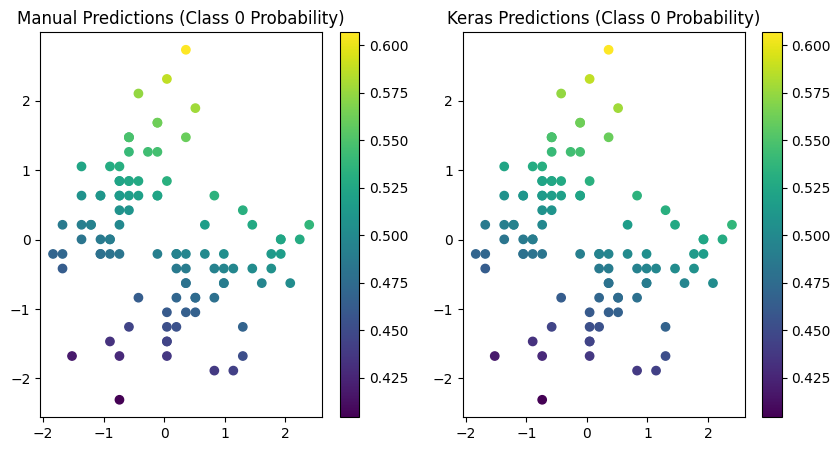

In [10]:

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=manual_output[:, 0])
plt.title('Manual Predictions (Class 0 Probability)')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=keras_output[:, 0])
plt.title('Keras Predictions (Class 0 Probability)')
plt.colorbar()
plt.show()

In [11]:

print("\nNote: The manual implementation matches Keras exactly, demonstrating")
print("how neural networks perform matrix operations under the hood.")


Note: The manual implementation matches Keras exactly, demonstrating
how neural networks perform matrix operations under the hood.
